<center><h1>STOCK MARKET ANALYSIS</h1></center>

![](https://cdn0.iconfinder.com/data/icons/investment-line-asset-allocation/512/Fund_manager-512.png)

Dependencies of Stock Market analysis

In [1]:
import quandl
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split 

Get data from "WIKI/FB" in quandl module

In [2]:
df= quandl.get("WIKI/FB")

Top 5 rows of stock data

In [3]:
print(df.head())

             Open   High    Low    Close       Volume  Ex-Dividend  \
Date                                                                 
2012-05-18  42.05  45.00  38.00  38.2318  573576400.0          0.0   
2012-05-21  36.53  36.66  33.00  34.0300  168192700.0          0.0   
2012-05-22  32.61  33.59  30.94  31.0000  101786600.0          0.0   
2012-05-23  31.37  32.50  31.36  32.0000   73600000.0          0.0   
2012-05-24  32.95  33.21  31.77  33.0300   50237200.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2012-05-18          1.0      42.05      45.00     38.00     38.2318   
2012-05-21          1.0      36.53      36.66     33.00     34.0300   
2012-05-22          1.0      32.61      33.59     30.94     31.0000   
2012-05-23          1.0      31.37      32.50     31.36     32.0000   
2012-05-24          1.0      32.95      33.21     31.77     33.0300   

           

Take Adjested Close Price

In [4]:
df=df[['Adj. Close']]

Top 5 Rows of Adjested Close Price

In [5]:
df.head()

,Adj. Close
Date,
2012-05-18,38.2318
2012-05-21,34.0300
2012-05-22,31.0000
2012-05-23,32.0000
2012-05-24,33.0300


In [6]:
forecast_out=30

<h4>Shift 30 rows of Adj. Close and make new column called Prediction(shifted n unit up)<h4>

In [7]:
df['Prediction'] = df[['Adj. Close']].shift(~forecast_out)
df.head()

,Adj. Close,Prediction
Date,,
2012-05-18,38.2318,31.20
2012-05-21,34.0300,31.47
2012-05-22,31.0000,31.73
2012-05-23,32.0000,32.17
2012-05-24,33.0300,31.47


Define Correlation between Adj. Close and Prediction (dark color depict low cor. and bright color shown more correlation between two column

In [8]:
import seaborn as sbn
sbn.heatmap(df.corr())

<h3>Create numpy array x which contain Adj. Close column only and remove last 30 data from it</h3>

In [9]:
x= np.array(df.drop(['Prediction'],1))
print(x)
X=x[:~forecast_out]
X.shape

[[ 38.2318]
 [ 34.03  ]
 [ 31.    ]
 ...
 [159.39  ]
 [160.06  ]
 [152.19  ]]


(1441, 1)

y  is an numpy array which contain Prediction Column and remove last null 30 values

In [10]:
y=np.array(df["Prediction"])
Y=y[:~forecast_out]
print(y)
print(Y)

[31.2  31.47 31.73 ...   nan   nan   nan]
[ 31.2   31.47  31.73 ... 159.39 160.06 152.19]


Convert data into testing data=33%  and remaining traininig data=67%  

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

<h4> Using "Simple Vector Machine"   algorithm to train data</h4>

In [12]:
svr=SVR(kernel='rbf',C=1e3,gamma=0.1)
svr.fit(X_train,y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Checking Accuracy of Testing data

In [13]:
svr.score(X_test,y_test)

0.9843728510988178

Checking Accuracy score of Training data

In [14]:
svr.score(X_train,y_train)

0.9867705340217551

<h4> Fit The model using algorith "Linear Regression" </h4>

In [15]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Checking testing data accuracy 

In [16]:
LR.score(X_test,y_test)

0.9787876187651161

Hence Accuracy of svm is good as compare to linear Regression so we chose svm for prediction in later.

<h3> In practical we define algorithms in once and used that algorittms one by one.</h3>
* Building  empty list name model define all algorithm.

In [17]:
model = []
model.append(('SVR',SVR(kernel='rbf',C=1e3,gamma=0.1)))
model.append(('LR',LinearRegression()))
result=[]
names=[]

using for loop for fitting  each algorithm one by one .
* name variable store name of the algorithm and res store algorith function to define.
* msg store all name and algorith which define name and score of testing and training data
* result and name are empty list  define previously store name of algo and score of there testing and training data.
* last print the msg variable.

In [18]:
for name, res in model:
    names.append(name)
    res.fit(X_train,y_train)
    res_test=res.score(X_test,y_test)
    res_train=res.score(X_train,y_train)
    msg="%s %f %f"%(name,res_train,res_test)
    result.append(res_train)
    result.append(res_test)
    print(msg)

SVR 0.986771 0.984373
LR 0.980213 0.978788


Now we take last 30 row data in numpy array x_forecast which previously remove from Adj. Close column and drop Prediction column from df data

In [19]:
x_forecast = np.array(df.drop(['Prediction'],1))[~forecast_out:]

All data value of x_forecast

In [20]:
print(x_forecast)


[[176.41]
 [173.15]
 [179.52]
 [179.96]
 [177.36]
 [176.01]
 [177.91]
 [178.99]
 [183.29]
 [184.93]
 [181.46]
 [178.32]
 [175.94]
 [176.62]
 [180.4 ]
 [179.78]
 [183.71]
 [182.34]
 [185.23]
 [184.76]
 [181.88]
 [184.19]
 [183.86]
 [185.09]
 [172.56]
 [168.15]
 [169.39]
 [164.89]
 [159.39]
 [160.06]
 [152.19]]


Now Predict 30 value of prevous x_forecast data for next n days 

In [21]:
svr_predict= svr.predict(x_forecast)
LR_predict= LR.predict(x_forecast)

In [22]:
print(svr_predict)
print(LR_predict)

[176.4017784  174.91085714 181.67633875 180.33638235 179.86355825
 175.8915459  182.21790424 183.11857358 178.84507892 170.21300181
 180.13298121 183.29393615 175.8568244  176.91541025 179.45315864
 180.85624327 176.53158493 181.20444711 169.82443479 170.72450871
 180.86108998 173.56618899 175.60802506 169.91946106 175.66411658
 172.4095709  172.6869149  171.49264508 168.42748638 167.08146743
 161.89601406]
[180.85646427 177.54783922 184.01285196 184.45941485 181.82063414
 180.450498   182.37883775 183.47494666 187.83908399 189.50354567
 185.98178834 182.79495317 180.37945391 181.06959655 184.90597774
 184.27673003 188.26534857 186.87491412 189.80802037 189.33101001
 186.40805291 188.75250808 188.41758592 189.66593218 176.94903898
 172.47326093 173.73175635 169.16463589 163.58259977 164.26259326
 156.27520703]


Showing Prediction using matplot lib graph where 
* blue colour reprsent Prediction values and 
* yellow represent x_Forecast value

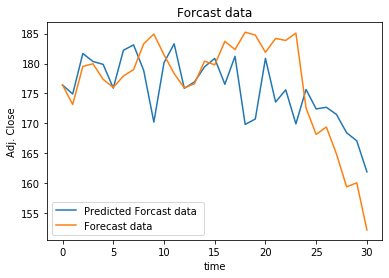

In [23]:
import matplotlib.pyplot as plt
plt.plot(svr_predict)
plt.plot(x_forecast)
plt.title ("Forcast data")
plt.xlabel("time")
plt.ylabel("Adj. Close")

plt.legend(['Predicted Forcast data ','Forecast data'])